In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('data_sleep_med.csv')
data.head(3)

,Patient_ID,Study_ID,PCORI_GENDER_CD,RACE_DESCR,Age during Study,Eye Movements,Eye Blink,Oral Breathing,Nasal Breathing,Holding Breath,...,Gag,Foot Movement,Movement,Hypopnea,Apnea,Apnea Hypopnea Index,AHI Class,BMI,BMIPCT,BP
0,10000,17728,M,White,7,2,0,0,0,5,...,0,2,39,1,5,0.857143,NONE,15.193333,42.135000,69.000000
1,10003,26038,M,Black or African American,13,5,1,1,3,43,...,0,0,31,25,16,5.857143,NORMAL,17.145263,45.376765,75.984848
2,10006,20647,F,Black or African American,5,7,1,1,1,1,...,0,3,8,0,2,0.285714,NONE,15.348000,39.001765,81.733333


In [2]:
data.info() #checking data types and null columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Patient_ID              3976 non-null   int64  
 1   Study_ID                3976 non-null   int64  
 2   PCORI_GENDER_CD         3976 non-null   object 
 3   RACE_DESCR              3976 non-null   object 
 4   Age during Study        3976 non-null   int64  
 5    Eye Movements          3976 non-null   int64  
 6    Eye Blink              3976 non-null   int64  
 7    Oral Breathing         3976 non-null   int64  
 8    Nasal Breathing        3976 non-null   int64  
 9    Holding Breath         3976 non-null   int64  
 10   Snoring/Snorting       3976 non-null   int64  
 11   Body Position: Supine  3976 non-null   int64  
 12   Body Position: Left    3976 non-null   int64  
 13   Body Position: Right   3976 non-null   int64  
 14   Body Position: Prone   3976 non-null   

In [3]:
data = data.drop(columns=['Patient_ID', 'Study_ID']) #Dropping ID columns
data.columns

Index(['PCORI_GENDER_CD', 'RACE_DESCR', 'Age during Study', ' Eye Movements',
       ' Eye Blink', ' Oral Breathing', ' Nasal Breathing', ' Holding Breath',
       ' Snoring/Snorting', ' Body Position: Supine', ' Body Position: Left',
       ' Body Position: Right', ' Body Position: Prone', ' Cough',
       ' Oxygen Desaturation', ' Awake', ' EEG Arousal', ' Gag',
       ' Foot Movement', ' Movement', ' Hypopnea', ' Apnea',
       ' Apnea Hypopnea Index', ' AHI Class', 'BMI', 'BMIPCT', 'BP'],
      dtype='object')

## Changing gender to categorical

In [4]:
data['PCORI_GENDER_CD'].unique()

array(['M', 'F', 'UN'], dtype=object)

In [5]:
data = data[data['PCORI_GENDER_CD'] != 'UN'] #dropping Unknown genders as it consists only a minute portion of the dataset
data['PCORI_GENDER_CD'].unique()

array(['M', 'F'], dtype=object)

In [6]:
data['PCORI_GENDER_CD'] = data['PCORI_GENDER_CD'].apply(lambda x: 0 if x=='M' else 1) #changing male and female to 0 and 1 for model fitting
data['PCORI_GENDER_CD'].unique()

array([0, 1], dtype=int64)

In [7]:
data['PCORI_GENDER_CD'] = data.PCORI_GENDER_CD.astype('category') #changing gender from numerical to categorical
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3975 entries, 0 to 3975
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PCORI_GENDER_CD         3975 non-null   category
 1   RACE_DESCR              3975 non-null   object  
 2   Age during Study        3975 non-null   int64   
 3    Eye Movements          3975 non-null   int64   
 4    Eye Blink              3975 non-null   int64   
 5    Oral Breathing         3975 non-null   int64   
 6    Nasal Breathing        3975 non-null   int64   
 7    Holding Breath         3975 non-null   int64   
 8    Snoring/Snorting       3975 non-null   int64   
 9    Body Position: Supine  3975 non-null   int64   
 10   Body Position: Left    3975 non-null   int64   
 11   Body Position: Right   3975 non-null   int64   
 12   Body Position: Prone   3975 non-null   int64   
 13   Cough                  3975 non-null   int64   
 14   Oxygen Desaturation    

## Changing Race to categorical

In [8]:
data['RACE_DESCR'].unique()

array(['White', 'Black or African American', 'Multiple race', 'Unknown',
       'Refuse to answer', 'American Indian or Alaska Native', 'Asian',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [9]:
data = data[data['RACE_DESCR'] != 'Unknown'] #dropping Unknown race
data = data[data['RACE_DESCR'] != 'Refuse to answer'] #dropping NA race
data['RACE_DESCR'].unique()

array(['White', 'Black or African American', 'Multiple race',
       'American Indian or Alaska Native', 'Asian',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [10]:
data['RACE_DESCR'] = data['RACE_DESCR'].map({'White':1,'Black or African American':2,'Multiple race':3, 'American Indian or Alaska Native':4, 'Asian':5, 'Native Hawaiian or Other Pacific Islander':6})
print(data['RACE_DESCR'].value_counts())

1    2627
2     800
3     299
5     111
6       5
4       3
Name: RACE_DESCR, dtype: int64


In [11]:
data['RACE_DESCR'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [12]:
data['RACE_DESCR'] = data.RACE_DESCR.astype('category') #changing race from numerical to categorical
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3845 entries, 0 to 3975
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   PCORI_GENDER_CD         3845 non-null   category
 1   RACE_DESCR              3845 non-null   category
 2   Age during Study        3845 non-null   int64   
 3    Eye Movements          3845 non-null   int64   
 4    Eye Blink              3845 non-null   int64   
 5    Oral Breathing         3845 non-null   int64   
 6    Nasal Breathing        3845 non-null   int64   
 7    Holding Breath         3845 non-null   int64   
 8    Snoring/Snorting       3845 non-null   int64   
 9    Body Position: Supine  3845 non-null   int64   
 10   Body Position: Left    3845 non-null   int64   
 11   Body Position: Right   3845 non-null   int64   
 12   Body Position: Prone   3845 non-null   int64   
 13   Cough                  3845 non-null   int64   
 14   Oxygen Desaturation    

## Correlation Matrix

<AxesSubplot:>

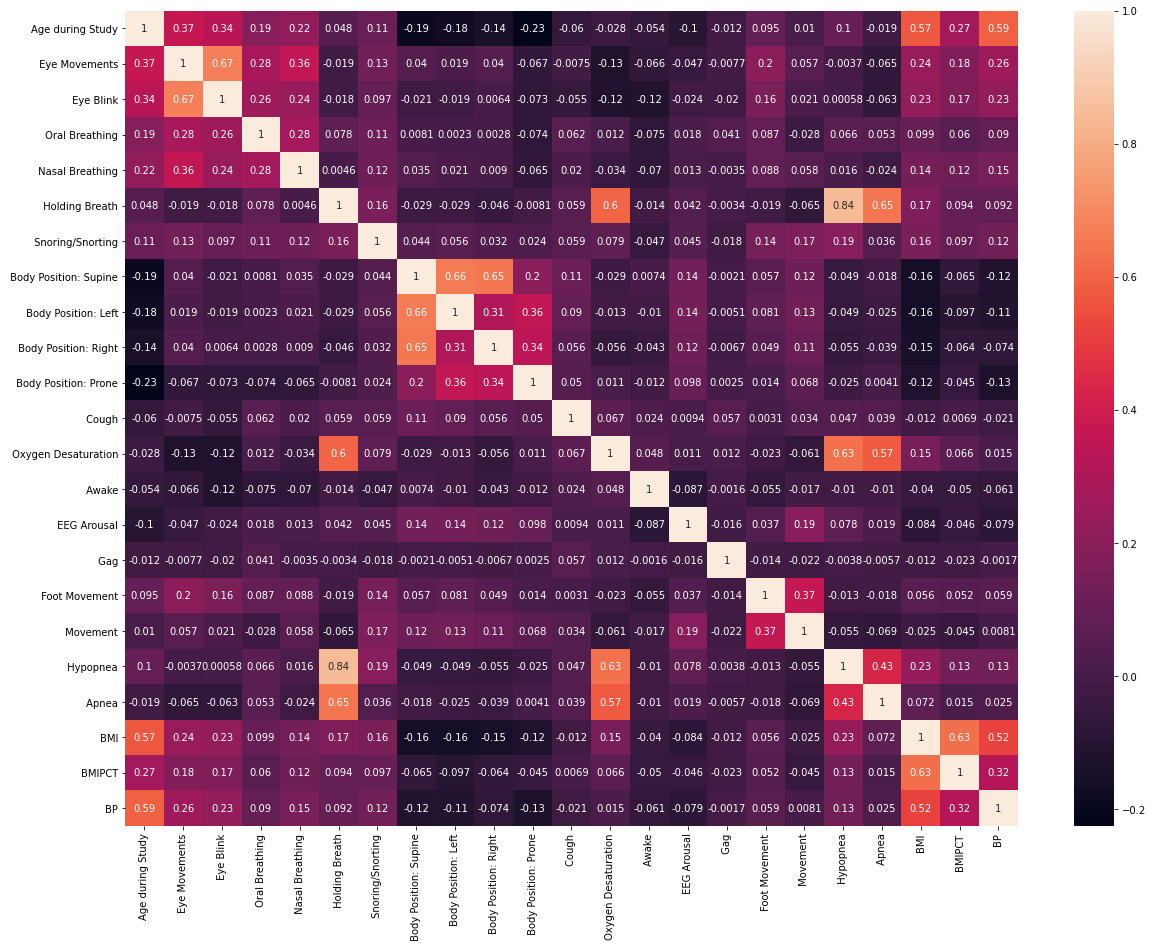

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

data_temp = data.copy()
data_temp = data_temp.drop([' Apnea Hypopnea Index'], axis=1) #Dropping AHI index
corr_med = data_temp.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_med, xticklabels=corr_med.columns, yticklabels=corr_med.columns, annot=True, )

## Splitting the dataset

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=[' Apnea Hypopnea Index', ' AHI Class']) #removing the two target variables
y = data[' Apnea Hypopnea Index'] #regression target variable

print(X.shape)
print(y.shape)

(3845, 25)
(3845,)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4) #making training and test sets

## Using Random Forest Model Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1,oob_score=True)
rf.fit(x_train, y_train)
s_validation = rf.score(x_test, y_test)
print(f"{s_validation:4f} score")

0.969813 score


In [17]:
rf.oob_score_

0.955217485342996

<BarContainer object of 25 artists>

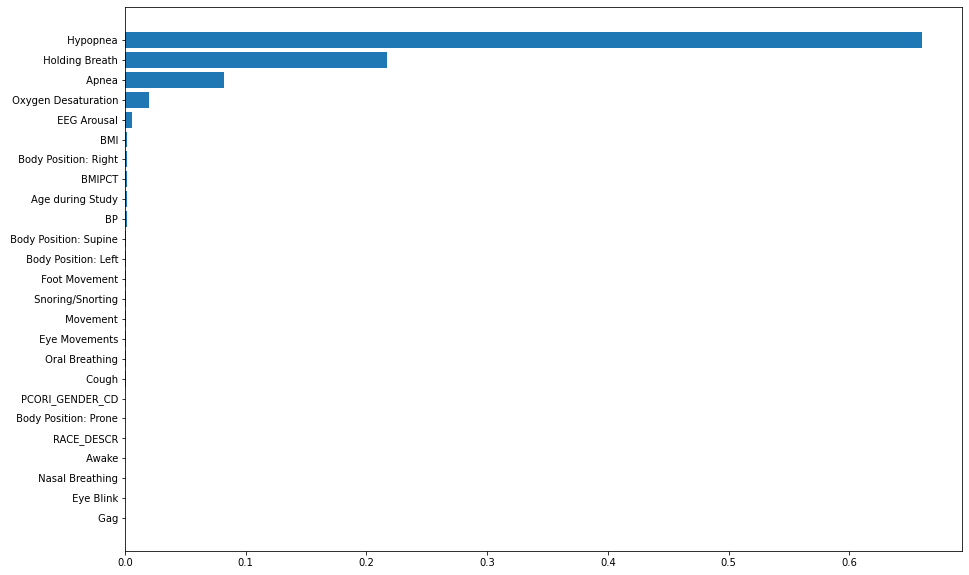

In [43]:
from matplotlib import pyplot as plt
sorted_idx = rf.feature_importances_.argsort()
importances = rf.feature_importances_[sorted_idx]
features = X.columns[sorted_idx]
plt.subplots(figsize=(15,10))
plt.barh(features, importances)

In [44]:
features = features.drop([" Hypopnea", " Apnea", " Holding Breath", " Oxygen Desaturation"])
features

Index([' Gag', ' Eye Blink', ' Nasal Breathing', ' Awake', 'RACE_DESCR',
       ' Body Position: Prone', 'PCORI_GENDER_CD', ' Cough', ' Oral Breathing',
       ' Eye Movements', ' Movement', ' Snoring/Snorting', ' Foot Movement',
       ' Body Position: Left', ' Body Position: Supine', 'BP',
       'Age during Study', 'BMIPCT', ' Body Position: Right', 'BMI',
       ' EEG Arousal'],
      dtype='object')

In [47]:
importances = importances[:-4]

<BarContainer object of 21 artists>

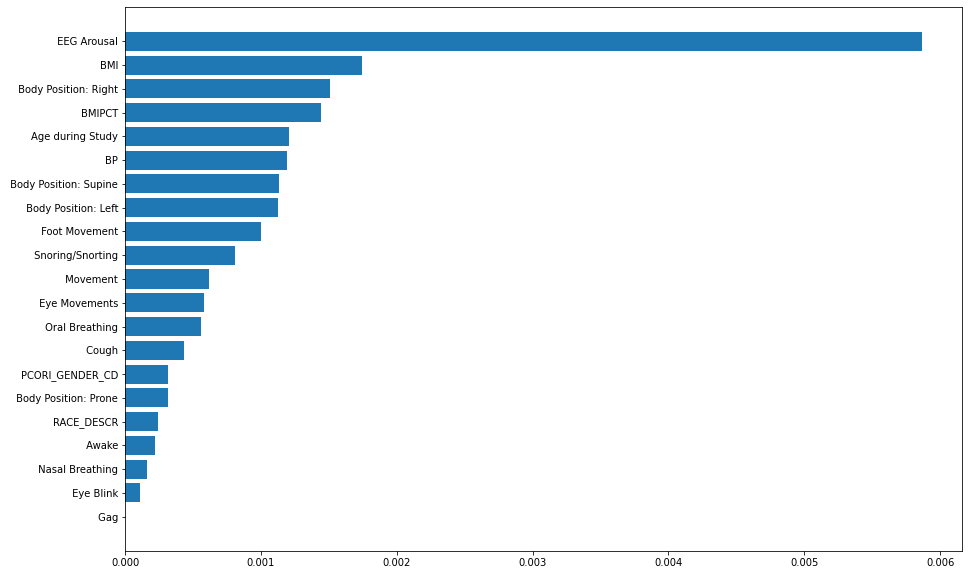

In [49]:
plt.subplots(figsize=(15,10))
plt.barh(features, importances)